In [5]:
# imports
from matplotlib import pyplot as plt
import compression_handler
import eval_handler
from dataset_handler.kodak import Kodak
from tqdm import tqdm

compression_algorithms = compression_handler.get_all()
eval_algorithms = eval_handler.get_all()
dataset = Kodak()
SAMPLES = 5

In [ ]:
# generate data
data = []
samples = dataset.get_samples(SAMPLES).itertuples()
for r_indx, row in tqdm(enumerate(samples), total=SAMPLES):
    data.append([])
    raw_image = dataset.get_PIL_image(row)
    for compression_algorithm in compression_algorithms:
        data[r_indx].append(compression_algorithm.parameter_range_handler(raw_image, eval_algorithms))
        


In [6]:
# TODO inject .__class__.__name__ into compression_algorithm so that we can use it as a label
names = [compression_algorithm.__class__.__name__ for compression_algorithm in compression_algorithms]
names [6] = "ms2020_cc10_mse"
names [7] = "ms2020_cc10_mseim"
names [8] = "mbt2018_mean_mse"
names [9] = "mbt2018_mean_msssim"
names [10] = "bmshj2018_factorized_mse"
names [11] = "bmshj2018_factorized_msssim"
names [12] = "bmshj2018_hyperprior_mse"
names [13] = "bmshj2018_hyperprior_msssim"
names [14] = "b2018_leaky_relu_128"
names [15] = "b2018_leaky_relu_192"
names [16] = "b2018_gdn_128"
names [17] = "b2018_gdn_192"

In [ ]:
# parse/average data
parsed = {}
for e_indx, eval_algorithm in enumerate(eval_algorithms):
    eval_data = {}
    for c_indx, compression_algorithm in enumerate(compression_algorithms):
        stream = []
        parameters = data[0][ c_indx].keys()
        for param in parameters:
            avrg_size = 0
            avrg_score = 0
            for sample in range(SAMPLES):
                avrg_size += data[sample][ c_indx][param][0]
                avrg_score += data[sample][ c_indx][param][1][e_indx]
            avrg_size /= SAMPLES
            avrg_score /= SAMPLES
            stream.append((avrg_size, avrg_score))
        stream = sorted(stream, key=lambda x: x[0])
        eval_data[names[c_indx]] = stream
    parsed[eval_algorithm.__class__.__name__] = eval_data
            

In [7]:
def save_parsed():
    import json as js
    with open("parsed_data.txt", "w") as f:
        f.write(js.dumps(parsed))
        
def load_parsed():
    import json as js
    with open("parsed_data.txt", "r") as f:
        return js.loads(f.read())
    
# save_parsed()
loaded = load_parsed()


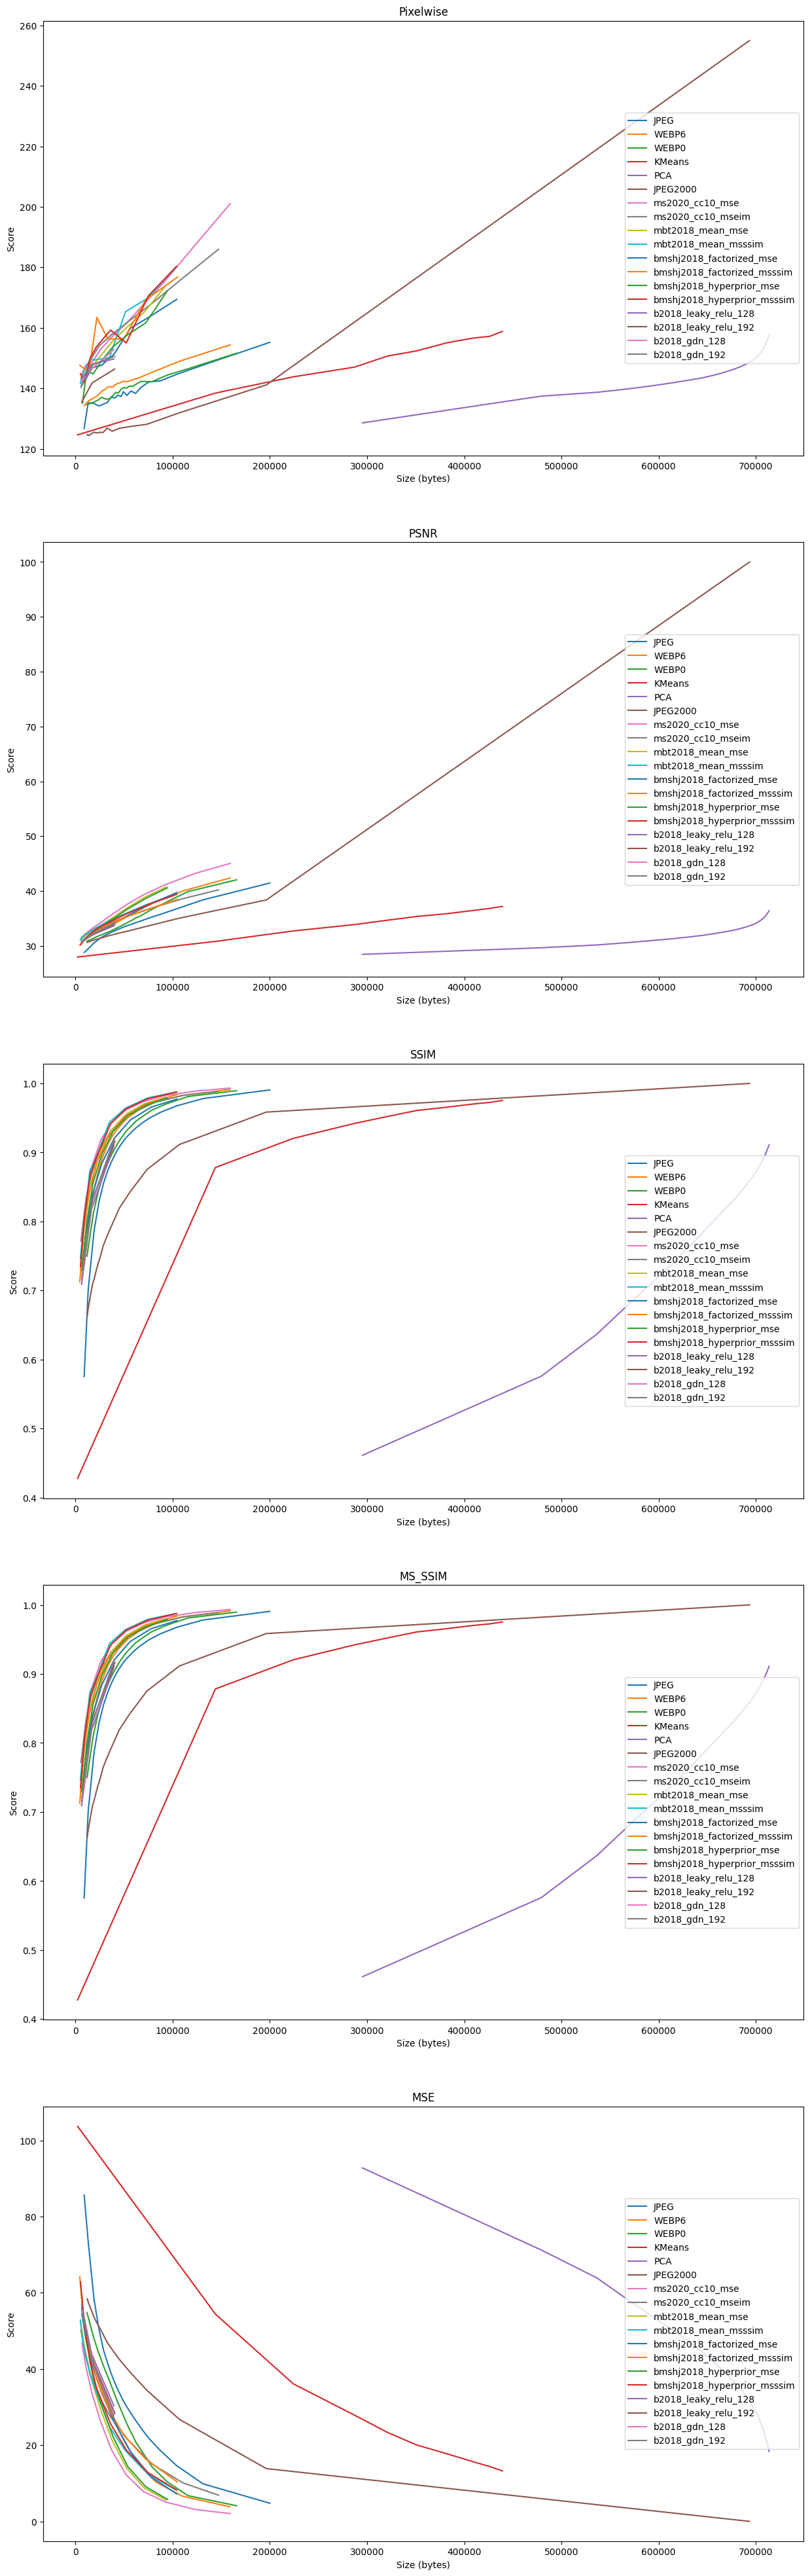

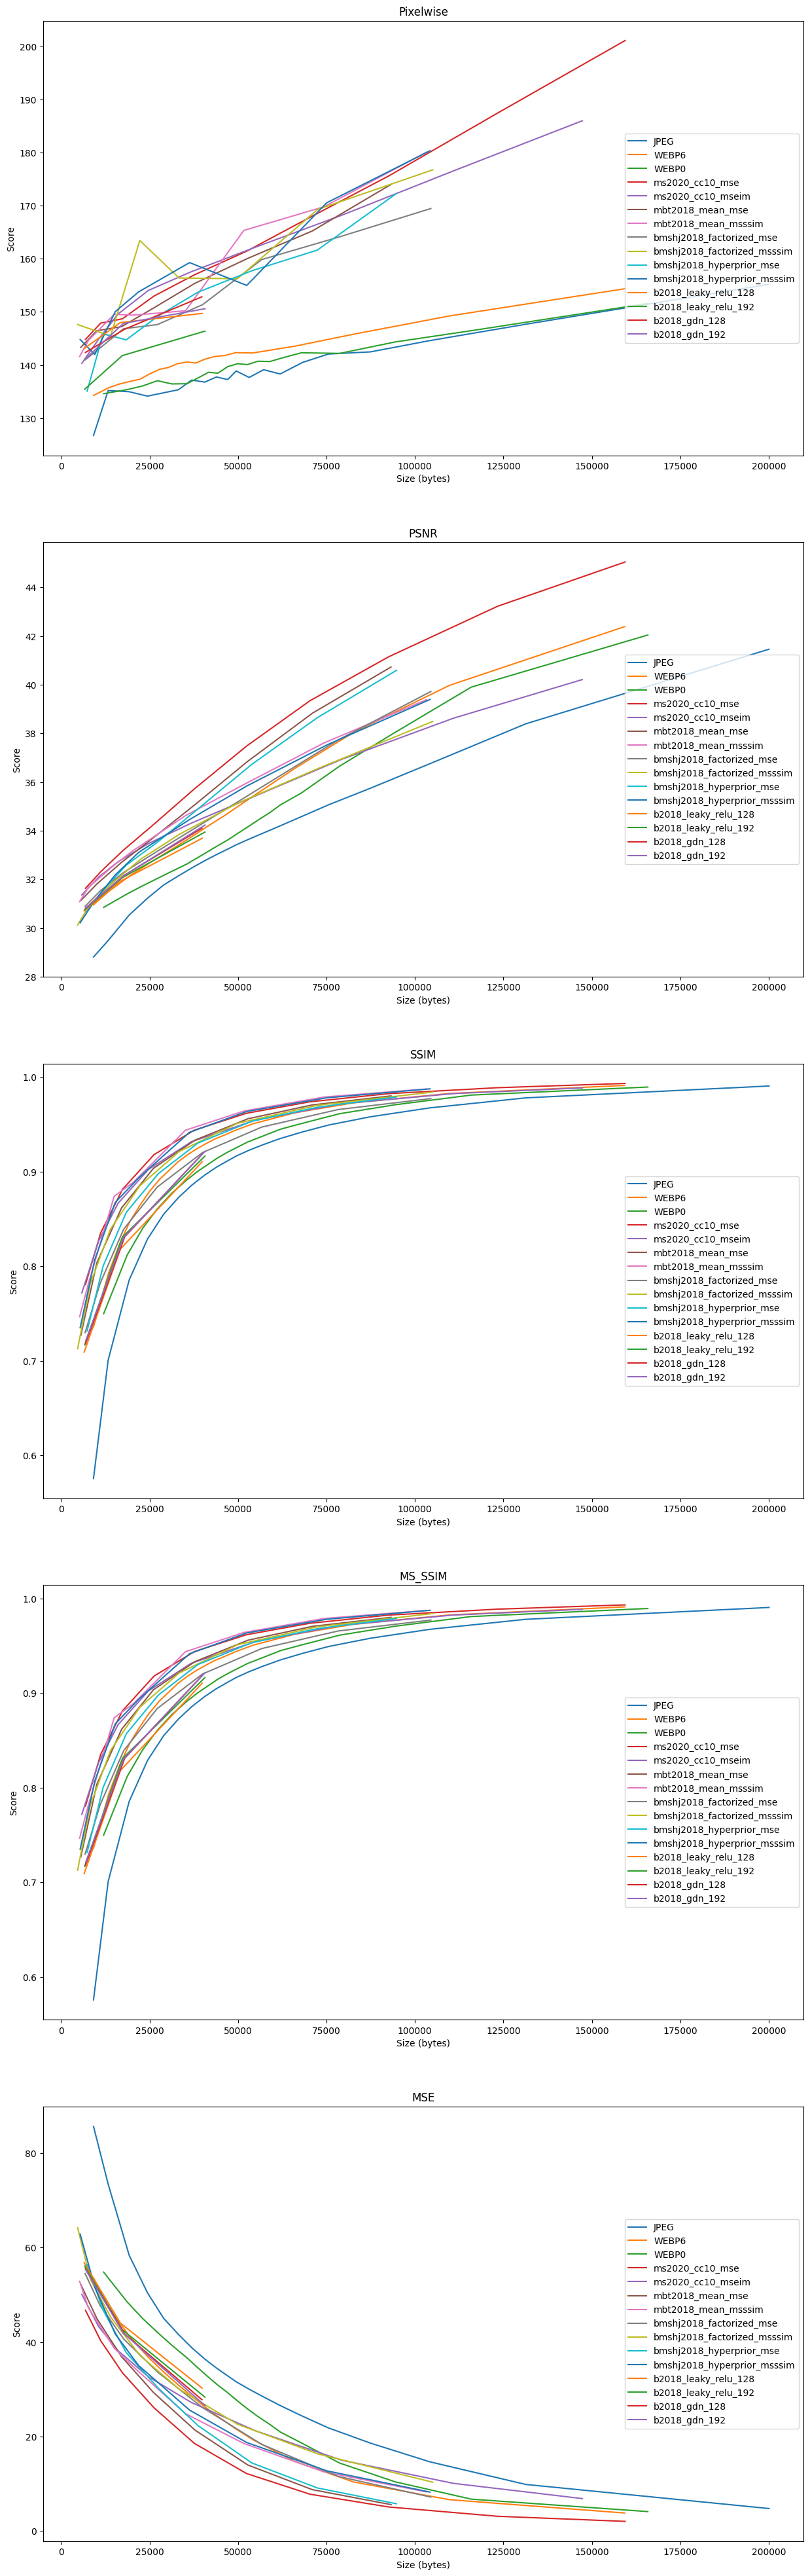

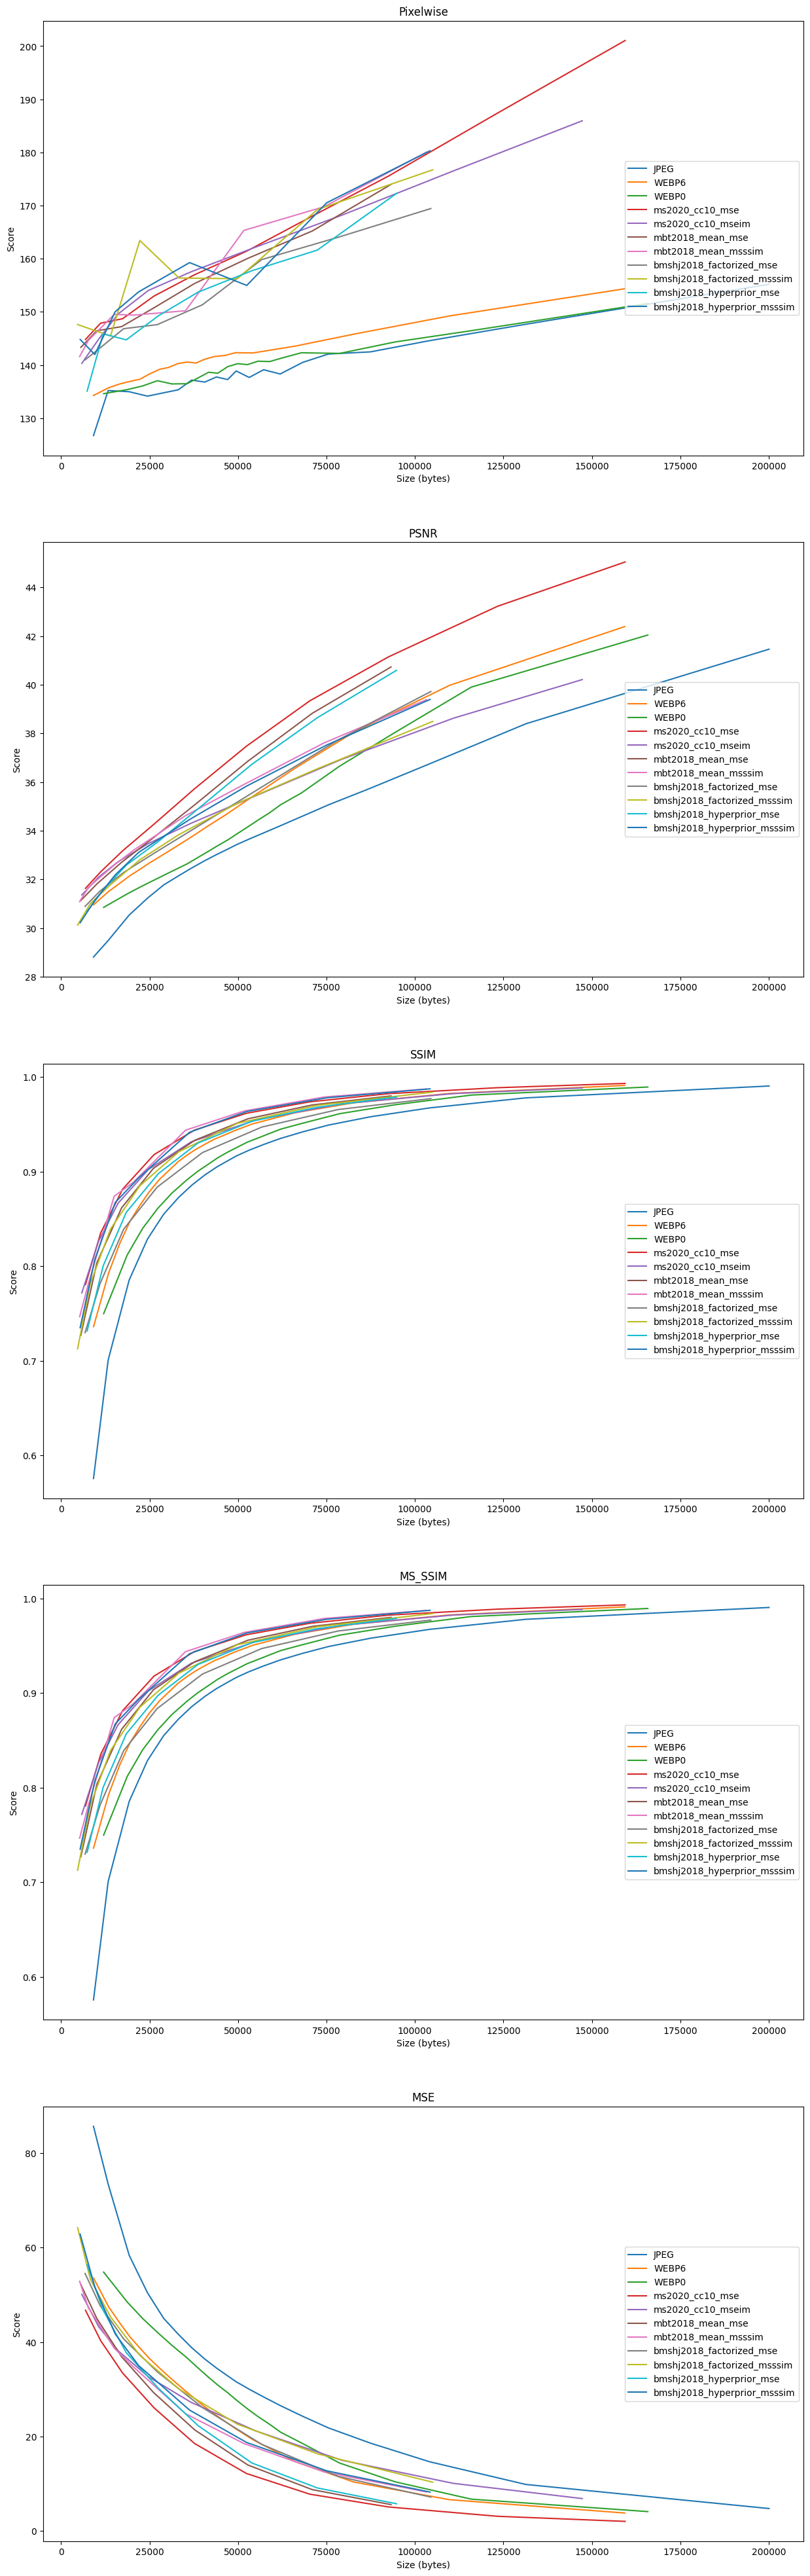

In [8]:
def plot_data(d, black_list = [], output = "compression_evaluation.png"): 
    plot, ax = plt.subplots( len(eval_algorithms),1, figsize=(15, 50))
    # plot, ax = plt.subplots(1, len(eval_algorithms))
    if ax.size == 1:
        ax = [ax]


    # plot the data
    for e_indx, eval_algorithm in enumerate(eval_algorithms):
        
        for c_indx, compression_algorithm in enumerate(compression_algorithms):
            if c_indx in black_list:
                continue
            ax[e_indx].plot([x[0] for x in d[eval_algorithm.__class__.__name__][names[c_indx]]], [x[1] for x in d[eval_algorithm.__class__.__name__][names[c_indx]]], label=names[c_indx])
        ax[e_indx].set_title(eval_algorithm.__class__.__name__)
        ax[e_indx].set_xlabel('Size (bytes)')
        ax[e_indx].set_ylabel('Score')
        ax[e_indx].legend(loc="center right", bbox_to_anchor=(1, 0.5))
        
            
    plt.savefig(output)
    
plot_data(loaded, output = "compression_evaluation.png")
plot_data(loaded, output = "no_outliers.png", black_list=[3,4,5])
plot_data(loaded, output = "no_outliers_no_b2018.png", black_list=[3,4,5,14,15,16,17])